In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/


In [1]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-23,277.940002,281.059998,275.200012,277.660004,275.399719,36610900
1,2023-03-24,277.239990,280.630005,275.279999,280.570007,278.286041,28172000
2,2023-03-27,280.500000,281.459991,275.519989,276.380005,274.130096,26840200
3,2023-03-28,275.790009,276.140015,272.049988,275.230011,272.989502,21878600
4,2023-03-29,278.959991,281.140015,278.410004,280.510010,278.226532,25087000
...,...,...,...,...,...,...,...
247,2024-03-18,414.250000,420.730011,413.779999,417.320007,417.320007,20106000
248,2024-03-19,417.829987,421.670013,415.549988,421.410004,421.410004,19837900
249,2024-03-20,422.000000,425.959991,420.660004,425.230011,425.230011,17860100
250,2024-03-21,429.829987,430.820007,427.160004,429.369995,429.369995,21296200


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-03-23,277.660004
1,2023-03-24,280.570007
2,2023-03-27,276.380005
3,2023-03-28,275.230011
4,2023-03-29,280.510010
...,...,...
247,2024-03-18,417.320007
248,2024-03-19,421.410004
249,2024-03-20,425.230011
250,2024-03-21,429.369995


In [3]:
df['Date']

0      2023-03-23
1      2023-03-24
2      2023-03-27
3      2023-03-28
4      2023-03-29
          ...    
247    2024-03-18
248    2024-03-19
249    2024-03-20
250    2024-03-21
251    2024-03-22
Name: Date, Length: 252, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2023-03-23')
datetime_object

datetime.datetime(2023, 3, 23, 0, 0)

In [5]:
df

,Date,Close
0,2023-03-23,277.660004
1,2023-03-24,280.570007
2,2023-03-27,276.380005
3,2023-03-28,275.230011
4,2023-03-29,280.510010
...,...,...
247,2024-03-18,417.320007
248,2024-03-19,421.410004
249,2024-03-20,425.230011
250,2024-03-21,429.369995


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-03-23
1     2023-03-24
2     2023-03-27
3     2023-03-28
4     2023-03-29
         ...    
247   2024-03-18
248   2024-03-19
249   2024-03-20
250   2024-03-21
251   2024-03-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-03-23,277.660004
2023-03-24,280.570007
2023-03-27,276.380005
2023-03-28,275.230011
2023-03-29,280.510010
...,...
2024-03-18,417.320007
2024-03-19,421.410004
2024-03-20,425.230011


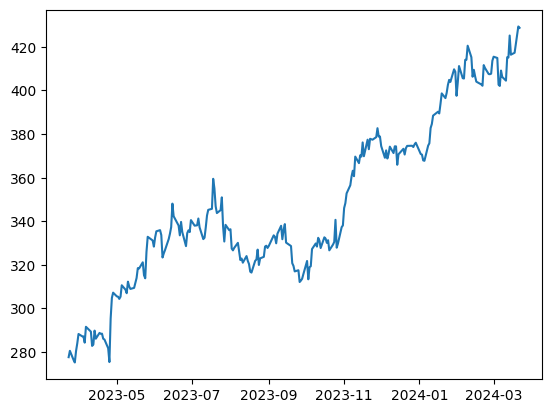

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [19]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-03-23'
windowed_df = df_to_windowed_df(df,
                                '2023-05-01',
                                '2024-03-15',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-05-01,295.369995,304.829987,307.260010,305.559998
1,2023-05-02,304.829987,307.260010,305.559998,305.410004
2,2023-05-03,307.260010,305.559998,305.410004,304.399994
3,2023-05-04,305.559998,305.410004,304.399994,305.410004
4,2023-05-05,305.410004,304.399994,305.410004,310.649994
...,...,...,...,...,...
216,2024-03-11,402.089996,409.140015,406.220001,404.519989
217,2024-03-12,409.140015,406.220001,404.519989,415.279999
218,2024-03-13,406.220001,404.519989,415.279999,415.100006
219,2024-03-14,404.519989,415.279999,415.100006,425.220001


In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((221,), (221, 3, 1), (221,))

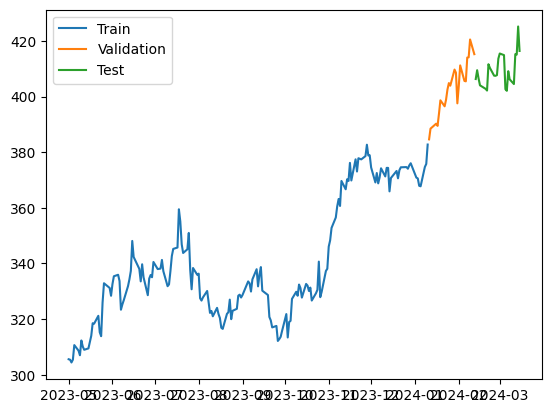

In [21]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 4s 212ms/step - loss: 115856.0469 - mean_absolute_error: 339.6954 - val_loss: 161941.5312 - val_mean_absolute_error: 402.3096
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 115589.9531 - mean_absolute_error: 339.3044 - val_loss: 161655.6719 - val_mean_absolute_error: 401.9541
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 115337.0938 - mean_absolute_error: 338.9307 - val_loss: 161339.1406 - val_mean_absolute_error: 401.5603
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 115059.4062 - mean_absolute_error: 338.5210 - val_loss: 160973.9844 - val_mean_absolute_error: 401.1053
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 114716.8984 - mean_absolute_error: 338.0138 - val_loss: 160501.3906 - val_mean_absolute_error: 400.5157
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 114305.7266 - mean_absolute_error: 337.4066 - v

6/6 [==============================] - 1s 3ms/step


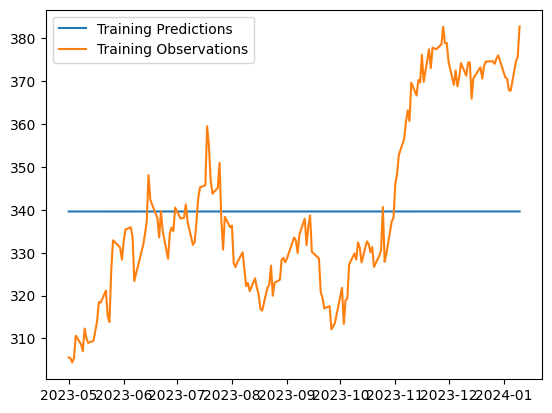

In [23]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 35ms/step


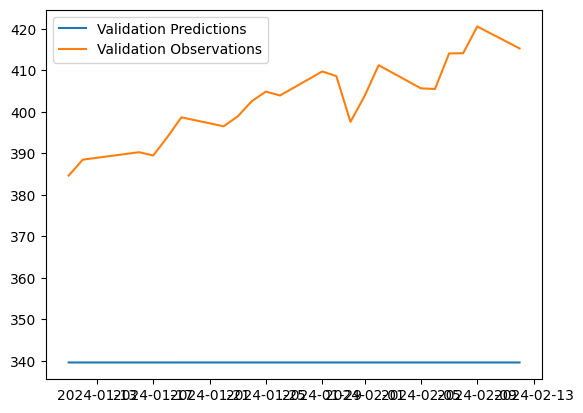

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 21ms/step


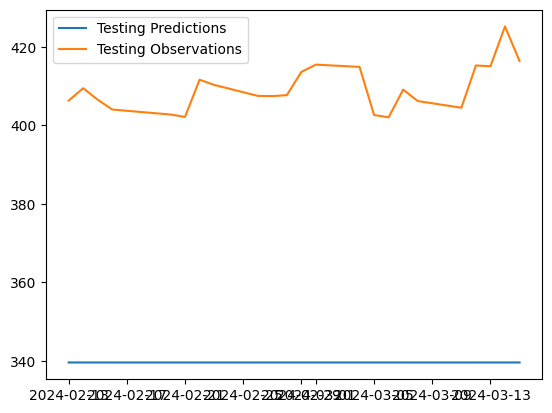

In [25]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

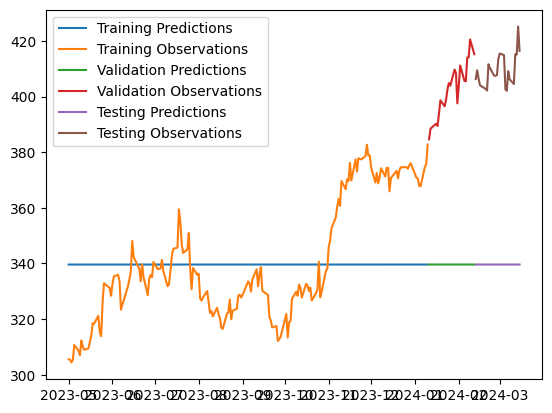

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [27]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 29ms/step


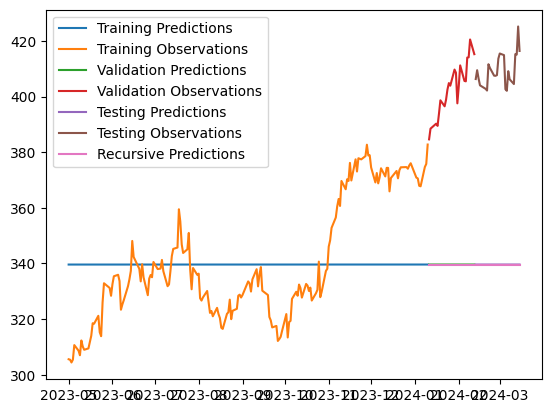

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])